In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.5.0


# Import Fashion MNIST dataset

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
# 10개의 라벨
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
# 28x28의 이미지가 60000개
train_images.shape

(60000, 28, 28)

In [6]:
# 라벨도 60000개
len(train_labels)

60000

In [8]:
# 0~9로 10개의 종류가 라벨링 되어있다
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [9]:
# test 데이터셋은 10000개
test_images.shape

(10000, 28, 28)

In [11]:
len(test_labels)

10000

# Preprocess the data

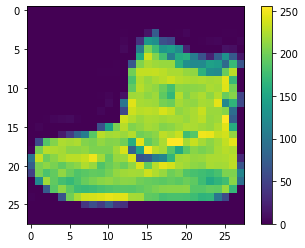

In [15]:
plt.figure()
plt.imshow(train_images[0]) # train data의 첫번째 이미지
plt.colorbar()
plt.grid(False) # 격자 제거
plt.show()

In [16]:
# 학습을 위해 0~1 값으로 정규화
train_images = train_images / 255.0
test_images = test_images / 255.0

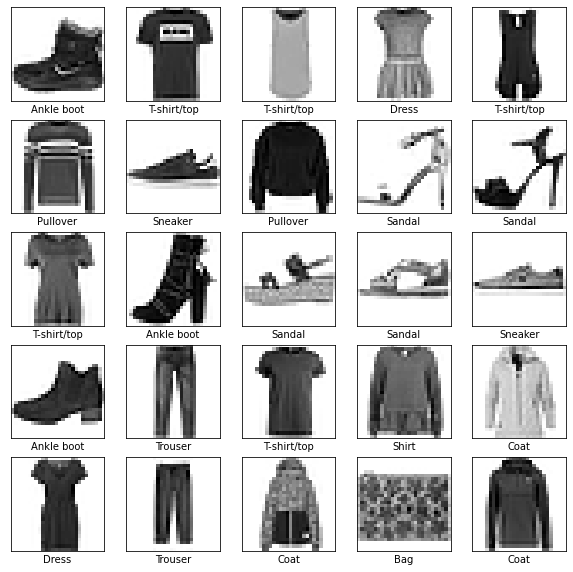

In [18]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    # xticks, yticks 제거
    plt.xticks([]) 
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
    plt.show()

# Build the model

In [22]:
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(28,28)), # 28x28 이미지를 1차원 784픽셀로 만든다
                             tf.keras.layers.Dense(128, activation='relu'), # 724 -> 128
                             tf.keras.layers.Dense(10) # 128->10
])

In [23]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model

## Feed the model

In [24]:
# train 데이터셋으로 학습시키기
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5022 - accuracy: 0.8246
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3782 - accuracy: 0.8626
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3357 - accuracy: 0.8773
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3129 - accuracy: 0.8845
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2944 - accuracy: 0.8909
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2807 - accuracy: 0.8956
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2664 - accuracy: 0.9006
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2567 - accuracy: 0.9042
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2473 - accuracy: 0.9075
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.240

## Evaluate accuracy

In [25]:
# test 데이터셋으로 정확도 측정
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3344 - accuracy: 0.8810

Test accuracy: 0.8809999823570251


## Make predictions

In [26]:
#기존 모델에 소프트맥스 추가
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [28]:
#test 데이터셋에 대한 예측값
predictions = probability_model.predict(test_images)
predictions[0]

array([1.2273508e-05, 1.9787310e-06, 3.6256175e-08, 3.6107504e-09,
       6.2362392e-06, 1.0381711e-03, 1.8753439e-05, 1.8825080e-02,
       1.1413992e-05, 9.8008597e-01], dtype=float32)

In [29]:
# 예측 라벨
np.argmax(predictions[0])

9

In [31]:
# 실제 라벨
test_labels[0]

9

## Verify predictions

In [32]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  # 예측이 맞으면 파란색 틀리면 빨간색
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  # 예측 클래스, 신뢰도, 실제 클래스
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  
  # 예측이 맞을 경우 파란색만 나타난다.
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

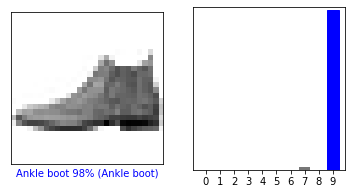

In [33]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

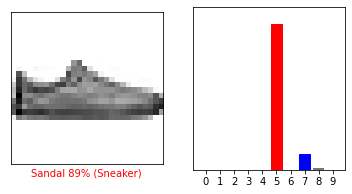

In [37]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

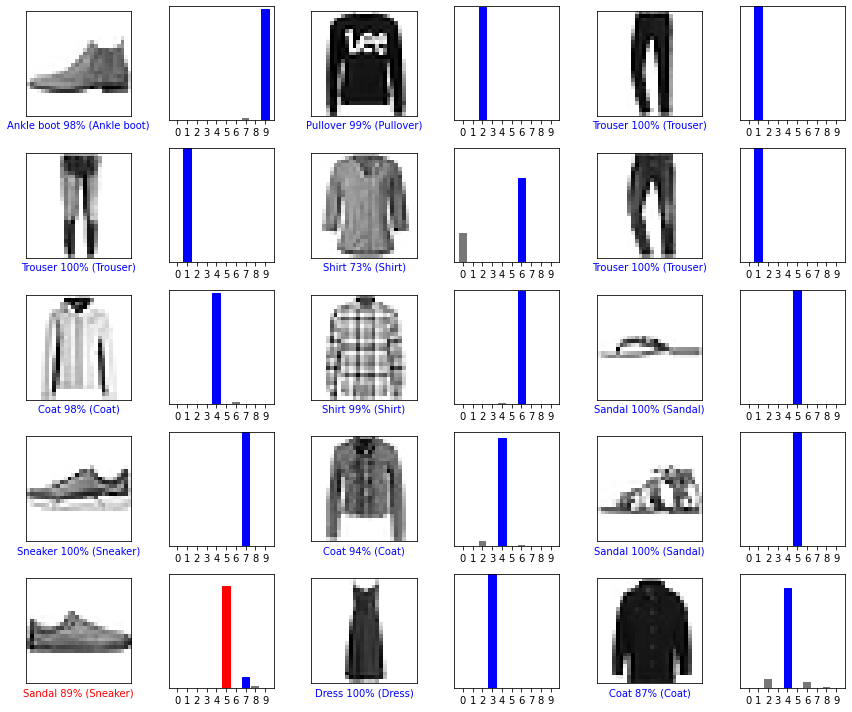

In [38]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  # 홀수번째 plot에는 이미지
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  # 짝수번째 plot에는 예측값
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

# Use the trained model

In [47]:
img = test_images[1]

print(img.shape)

(28, 28)


In [48]:
# 0번째에 차원 하나 추가
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [49]:
# 예측값
predictions_single = probability_model.predict(img)

print(predictions_single)

[[3.8125273e-04 1.7499509e-15 9.9220496e-01 6.5559430e-10 6.1624972e-03
  2.0032202e-11 1.2512914e-03 1.6412094e-20 1.0192347e-09 9.6135003e-19]]


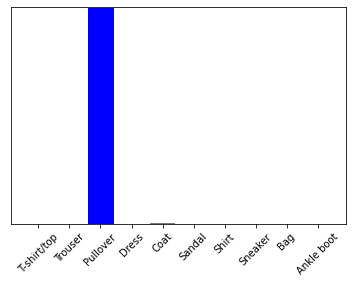

In [53]:
# 예측값 plot
plot_value_array(1, predictions_single[0], test_labels)
plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [54]:
# 예측 라벨
np.argmax(predictions_single[0])

2